In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
from sodapy import Socrata

import json
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Scrapping Data

In [3]:
creds_file = open('./creds.json', 'r')
socrata_creds = json.loads(creds_file.read())

In [25]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", socrata_creds['app_token'])

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

In [46]:
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("k46n-sa2m", limit = 10_000);

# Convert to pandas DataFrame
daily_df = pd.DataFrame.from_records(results);

# Data wrangling

In [6]:
daily_df['date_of_census'] = daily_df['date_of_census'].apply(lambda x: x.split('T')[0])

daily_df.index = pd.to_datetime(daily_df['date_of_census'], format = "%Y/%m/%d")
daily_df = daily_df.drop('date_of_census', axis = 1)

daily_df = daily_df.apply(pd.to_numeric)

In [7]:
weekly_df = daily_df.resample('W').mean()

# Train Test Split

In [8]:
train, test = train_test_split(weekly_df['total_individuals_in_shelter'],
                               test_size = 0.25,
                               shuffle = False,
                               random_state = 274)

# Modeling

In [11]:
# Fit a SARIMA(0, 1, 0) x (2, 2, 0, 52) model.

sarima = SARIMAX(endog = train,
                 order = (0, 1, 0),              # (p, d, q)
                 seasonal_order = (2, 2, 0, 52) ) # (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
preds = model.predict(start=test.index[0], # X_test data range
                      end=test.index[-1])
# # Evaluate predictions.
# print(mean_squared_error(test, preds))

# Plot Data

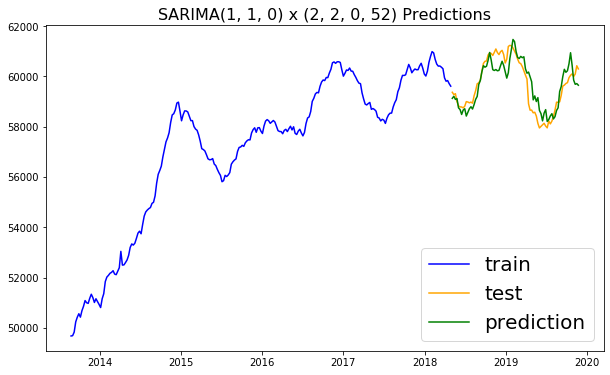

In [12]:
plt.figure(figsize=(10,6))
plt.plot(train, color = 'blue', label = 'train')
plt.plot(test, color = 'orange', label = 'test')
plt.plot(preds, color = 'green', label = 'prediction')
plt.title(label = 'SARIMA(1, 1, 0) x (2, 2, 0, 52) Predictions', fontsize=16)
plt.legend(fontsize = 20)
plt.show();

In [45]:
daily_df['total_individuals_in_shelter'][0]

'49673'

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

daily_df = daily_df.loc[:,['date_of_census', 'total_individuals_in_shelter']]
daily_df.index = pd.to_datetime(daily_df['date_of_census'], format = '%Y/%m/%d')
daily_df = daily_df.sort_index()
daily_df = daily_df.drop('date_of_census', axis = 1)
daily_df = daily_df.apply(pd.to_numeric)

weekly_df = daily_df.resample('W').mean()



In [57]:
sarima = SARIMAX(endog = list(weekly_df['total_individuals_in_shelter']), order = (0, 1, 0), seasonal_order = (2, 2, 0, 52) )

model = sarima.fit()

In [66]:
preds = model.predict(end=10)

In [67]:
len(weekly_df)

327

In [68]:
len(preds)

11

In [48]:
weekly_df

,total_individuals_in_shelter
date_of_census,
2013-08-25,49677.200000
2013-09-01,49689.000000
2013-09-08,49829.600000
2013-09-15,50238.714286
2013-09-22,50423.285714
...,...
2019-10-27,60095.714286
2019-11-03,59989.142857
2019-11-10,60089.142857


# Trial 2

In [ ]:
SCRIPT_REAL("import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

daily_df = pd.DataFrame({'date_of_census': _arg1, 'total_individuals_in_shelter': _arg2})
daily_df.index = pd.to_datetime(daily_df['date_of_census'], format = '%Y/%m/%d')
daily_df = daily_df.sort_index()
daily_df = daily_df.drop('date_of_census', axis = 1)
daily_df = daily_df.apply(pd.to_numeric)

weekly_df = daily_df.resample('W').mean()

sarima = SARIMAX(endog = list(weekly_df['total_individuals_in_shelter']), order = (0, 1, 0), seasonal_order = (2, 2, 0, 52) )
model = sarima.fit()

preds = model.predict()
           
return preds.tolist()

", [date], [total_indiv])

# Trial 1

In [ ]:
SCRIPT_REAL("import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

daily_df = pd.DataFrame({'date_of_census': _arg1, 'total_individuals_in_shelter': _arg2})
daily_df = daily_df.set_index('date_of_census').sort_index()

daily_df.index = pd.to_datetime(daily_df['date_of_census'], format = "%Y/%m/%d")
daily_df = daily_df.drop('date_of_census', axis = 1)


weekly_df = daily_df.resample('W').mean()

train, test = train_test_split(weekly_df['total_individuals_in_shelter'],
                               test_size = 0.25,
                               shuffle = False,
                               random_state = 274)

sarima = SARIMAX(endog = train, order = (0, 1, 0), seasonal_order = (2, 2, 0, 52) )

model = sarima.fit()

preds = model.predict(start=test.index[0], end = _arg3)
           
return preds.tolist()

", ATTR([date]), AVG([total_indiv]), ATTR([predict_until]))